## Resampling, Shifting, Rolling and Expanding of Time Series data

In [1]:
# library imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset

However in order for Pandas to read the index as DateTime objects and not string, we use one more additional 
parameter called parse_dates

In [2]:
df = pd.read_csv("datasets/starbucks.csv",
                index_col='Date', parse_dates=True)

# Check the first few rows
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


### Resampling

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of 
aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. 
[[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to 
             join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [3]:
# Lets take a look at our index
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [4]:
# Yearly averages
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function 
(in this case we calculate the mean), and reports the result as the last day of that year.

In [5]:
# Similarly monthly averages
df.resample(rule='M').mean()

,Close,Volume
Date,,
2015-01-31,38.729470,1.336800e+07
2015-02-28,42.862432,7.908719e+06
2015-03-31,44.321836,8.905969e+06
2015-04-30,45.508914,8.540996e+06
2015-05-31,47.488650,6.723716e+06
2015-06-30,49.761627,6.856079e+06
2015-07-31,52.437959,8.087759e+06
2015-08-31,52.797976,1.064881e+07
2015-09-30,53.006186,8.935548e+06


#### Custom resampling functions

We're not limited to pandas built-in summary functions (min/max/mean etc.). We can define our own function:

In [6]:
def first_day(entry):
    """
    Returns the first instance of the period, regardless of the sampling rate
    """
    if len(entry):
        return entry[0]
    
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


#### Plotting

We can use this directly in graphical representations

<AxesSubplot:title={'center':'Yearly Mean Closing Price for Starbucks'}, xlabel='Date'>

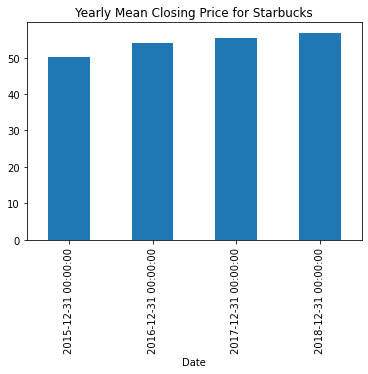

In [7]:
# Yearly mean closing price representation
df['Close'].resample(rule='A').mean().plot.bar(title='Yearly Mean Closing Price for Starbucks')

<AxesSubplot:title={'center':'Monthly Max Closing price for Starbucks'}, xlabel='Date'>

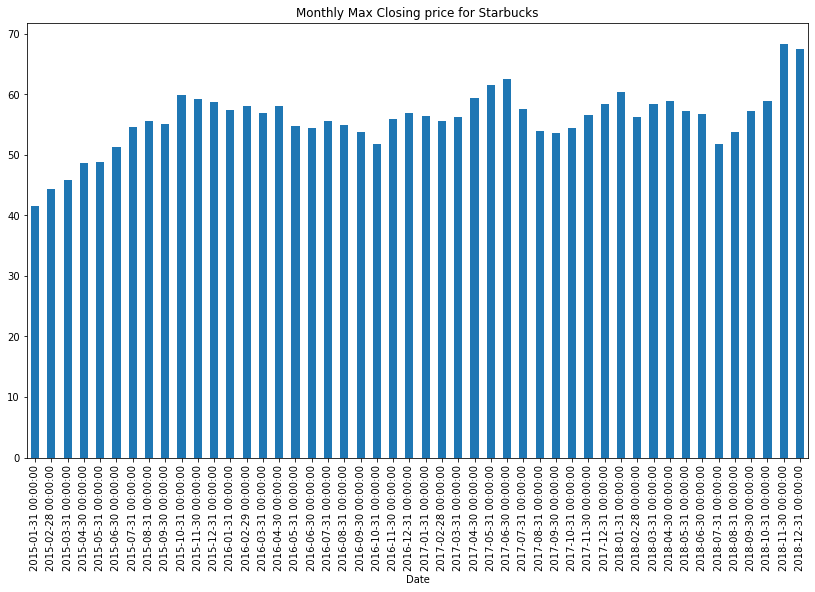

In [8]:
# Monthly max closing price for Starbucks

plt.figure(figsize=(14, 8))
df['Close'].resample(rule='M').max().plot.bar(title='Monthly Max Closing price for Starbucks')

## Shifting based on Time Series Frequency Code

We can choose to shift <em>index values</em> up or down without realigning the data by passing in a <strong>freq</strong> argument.<br>
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end. <br>Refer to the <em>Time Series Offset Aliases</em> table from the Time Resampling lecture for a full list of values, or click <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.<br>

Sometimes we may need to shift all your data up or down along the time series index. 

#### .shift() forward

This method shifts the entire date index a given number of rows, without regard for time periods (months & years).
It returns a modified copy of the original DataFrame.

In [9]:
# Check the first five and last five rows
print(df.head())
print(df.tail())

              Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548
            Close    Volume
Date                       
2018-12-24  60.56   6323252
2018-12-26  63.08  16646238
2018-12-27  63.20  11308081
2018-12-28  63.39   7712127
2018-12-31  64.40   7690183


In [10]:
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [11]:
# NOTE: We will lose that last piece of data that no longer has an index!
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [12]:
# The first data gets filled filled up as NaN - as it got shifted... If we dont want NaN and wants to fill it with
# zeros

df.shift(periods=1, fill_value=0.0).head()

,Close,Volume
Date,,
2015-01-02,0.0000,0.0
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


#### .shift() backward

In [13]:
df.shift(-1).head()  # Move everything back 1 - So we will technically loose the first row

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


In [14]:
# also the last row would be empty
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


### Shifting based on Time Series Frequency Code

We can choose to shift <em>index values</em> up or down without realigning the data by passing in a <strong>freq</strong> argument.<br>
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end. <br>Refer to the <em>Time Series Offset Aliases</em> table from the Time Resampling lecture for a full list of values, or click <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.<br>

In [15]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [16]:
# Shift everything forward by one month
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


For more info on time shifting visit http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html

### Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a simple moving average.

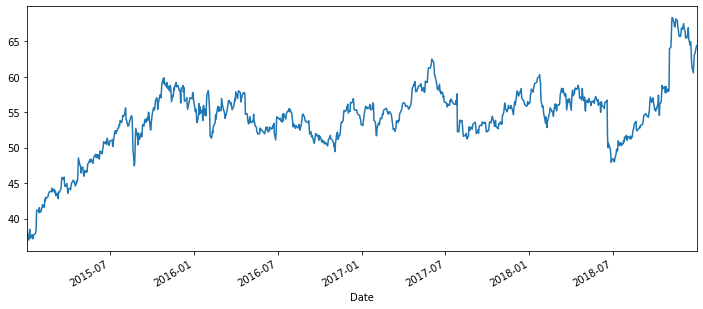

In [17]:
# to begin with, we will plot the closing of starbucks

df['Close'].plot(figsize=(12, 5)).autoscale(axis='x', tight=True)

Now lets add a rolling mean!! This rolling method provides new row entries where every entry is then
representative or the window.

In [18]:
# We will now attempt to create a rolling mean for seven days
df.rolling(window=7).mean().head(10)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


The first 6 values will become NaN, because it wont have enough data to calculate an average for these days, 
but from the seventh day onwards, we will have values

<AxesSubplot:xlabel='Date'>

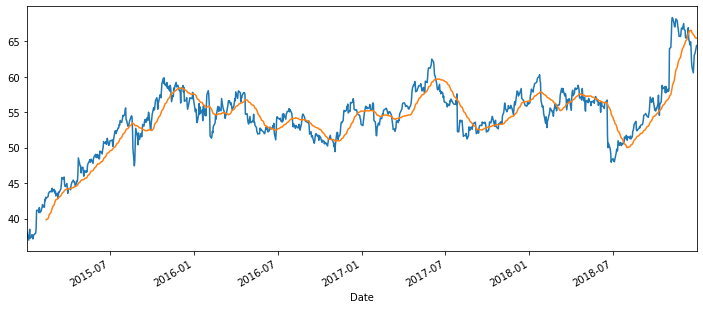

In [19]:
# We will now attempt to plot the Close price with 30 day rolling mean

df['Close'].plot(figsize=(12, 5)).autoscale(axis='x', tight=True)
df['Close'].rolling(window=30).mean().plot()

The easiest way to add a legend is to make the rolling value a new column, then pandas does it automatically!

Text(0.5, 1.0, 'Close vs 30 Day Closing average')

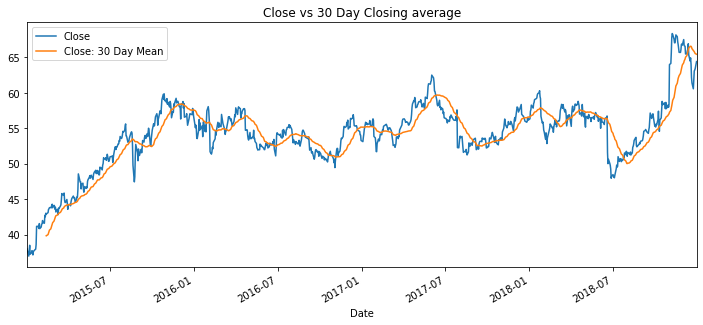

In [20]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(12, 5)).autoscale(axis='x', tight=True)
plt.title('Close vs 30 Day Closing average')

### Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from  the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

In [21]:
df['Close'].expanding(min_periods=30).mean()

Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
                ...    
2018-12-24    54.032419
2018-12-26    54.041439
2018-12-27    54.050561
2018-12-28    54.059854
2018-12-31    54.070133
Name: Close, Length: 1006, dtype: float64

<AxesSubplot:xlabel='Date'>

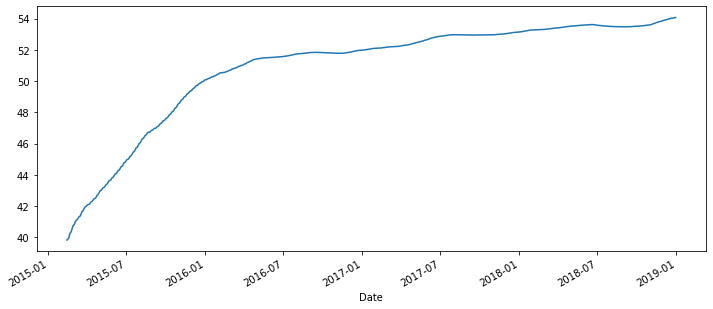

In [22]:
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12, 5))

So essentially the mean would keep on increasing and from 15th day onwards the average value will stabilise,
This will show not much volatality in stocks...

That's it! It doesn't help much to visualize an expanding operation against the daily data, since all it really gives us is a picture of the "stability" or "volatility" of a stock